# Class 18: Mid Semester Checkin, Git, & How GNB makes decisions

- Share your favorite thing about fall (or just say hi) in the zoom chat for attendance
- log onto Prismia
- accept Assignment 6
- install git or GitBash if needed

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(font_scale = 2)

## Feedback Review

Thank you for the feedback. You can add more on Friday's notes if you did not give any yet.

In [2]:
feedback_df = pd.read_csv('data/feedback_structured.csv')
feedback_df.head()

,How much do you think you've learned so far this semester?,How much of the material that's been taught do you feel you understand?,How do you think the achievements you've earned so far align with your understanding?,Rank the following as what you feel the grading (when you do/not earn achievements) so far actually reflects about your performance in the class [How well I follow instructions],Rank the following as what you feel the grading (when you do/not earn achievements) so far actually reflects about your performance in the class [What I understand about the material],Rank the following as what you feel the grading (when you do/not earn achievements) so far actually reflects about your performance in the class [How much effort I put into assignments],How fair do you think the amount each of the following is reflected in the grading [How well I follow instructions],How fair do you think the amount each of the following is reflected in the grading [What I understand about the material],How fair do you think the amount each of the following is reflected in the grading [How much effort I put into assignments],Which of the following have you done to support your learning outside of class?
0,4,3,I think they reflect my understanding well,Reflected moderately in the grading,Reflected strongly in the grading,Reflected perfectly in the grading,Is fairly reflected in the grading,Should be reflected more in the grading,Should be reflected more in the grading,"read the notes online, download and run the notes"
1,4,4,I think the achievements underestimate what I ...,Reflected strongly in the grading,Reflected strongly in the grading,Reflected moderately in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,Should be reflected more in the grading,"read the notes online, download and run the no..."
2,3,3,I think they reflect my understanding well,Reflected moderately in the grading,Reflected moderately in the grading,Reflected moderately in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,"read the notes online, experimenting with the ..."
3,4,3,I think they reflect my understanding well,Reflected moderately in the grading,Reflected moderately in the grading,Reflected moderately in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,"read the notes online, download and run the no..."
4,3,3,I think they reflect my understanding well,Reflected strongly in the grading,Reflected moderately in the grading,Reflected strongly in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,"read the notes online, experimenting with the ..."


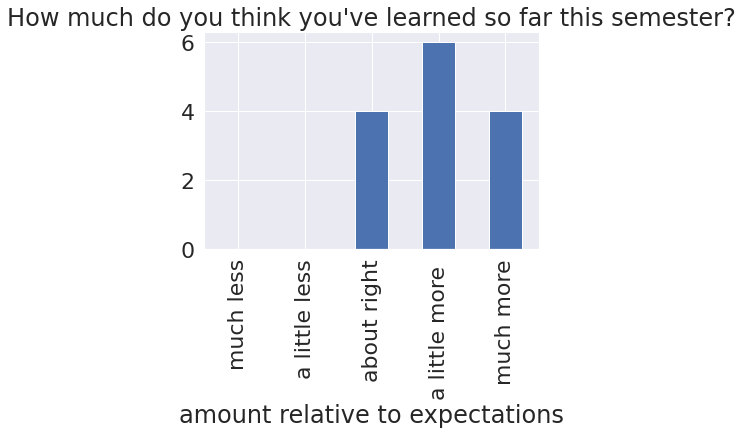

In [3]:
el_meaning = {1: 'much less',
 2: 'a little less',
 3: 'about right',
 4: 'a little more ',
 5: 'much more'}

expected_learning = feedback_df[feedback_df.columns[0]]
el_counts,_ = np.histogram(expected_learning,bins = [i+.5 for i in range(6)])
el_df = pd.DataFrame(data = el_counts,index = el_meaning.values(),columns= [expected_learning._name],)
# el_df.reset_index(inplace=True)
# el_df = el_df.rename(columns= {'index':'amount'}).set_index('amount')
el_df.rename_axis(index='amount relative to expectations',inplace=True)
el_df.plot.bar(legend=False,title=expected_learning._name,);

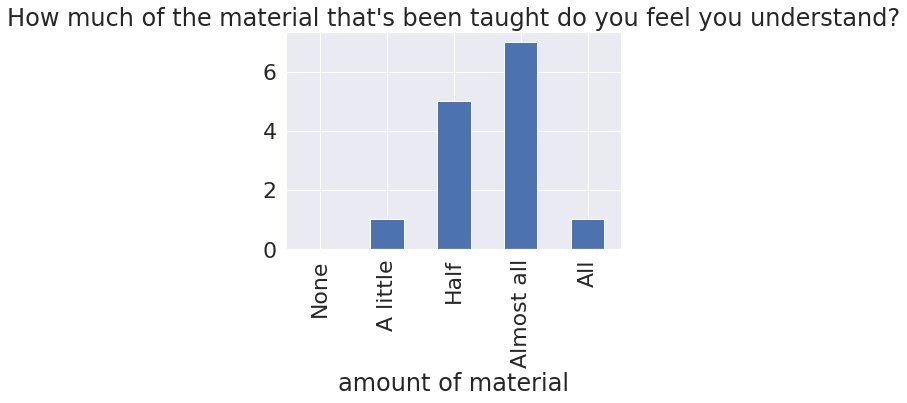

In [4]:
u_meaning = {0:'None', 1:'A little',3:'Half', 4:'Almost all',5:'All'}
u_col = feedback_df[feedback_df.columns[1]]
u_counts,_ = np.histogram(u_col,bins = [i+.5 for i in range(6)])
understanding_df = pd.DataFrame(data = u_counts,index = u_meaning.values(),columns= [u_col._name],)

understanding_df.rename_axis(index='amount of material',inplace=True)
understanding_df.plot.bar(legend=False,title=u_col._name,);

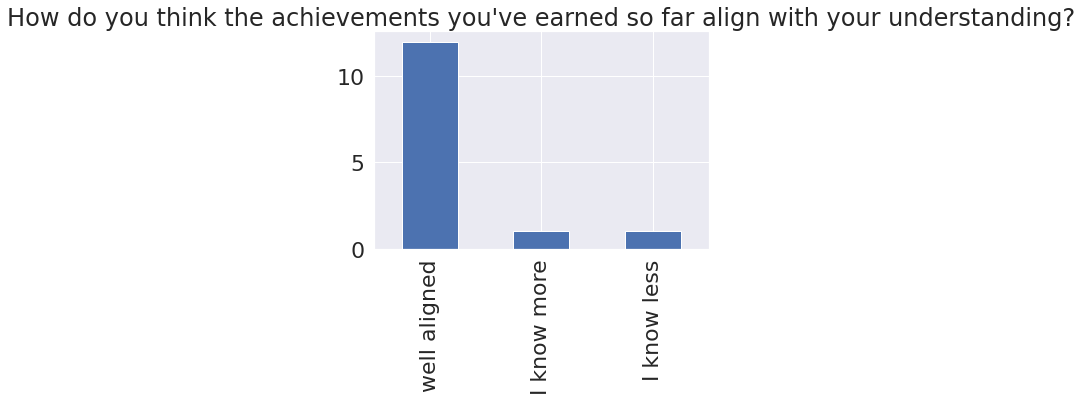

In [5]:
align = [c_name for c_name in feedback_df.columns if 'align' in c_name][0]
align_df = feedback_df[align].copy()
align_counts = align_df.value_counts()
align_kw = {'well':'well aligned','more':'I know more','less':'I know less'}
# # kw_replace =
align_counts.rename(index={s: [align_kw[kw] for kw in align_kw.keys() if kw in s][0] for s in align_counts.index},inplace=True)
align_counts.plot.bar(title=align_counts._name);

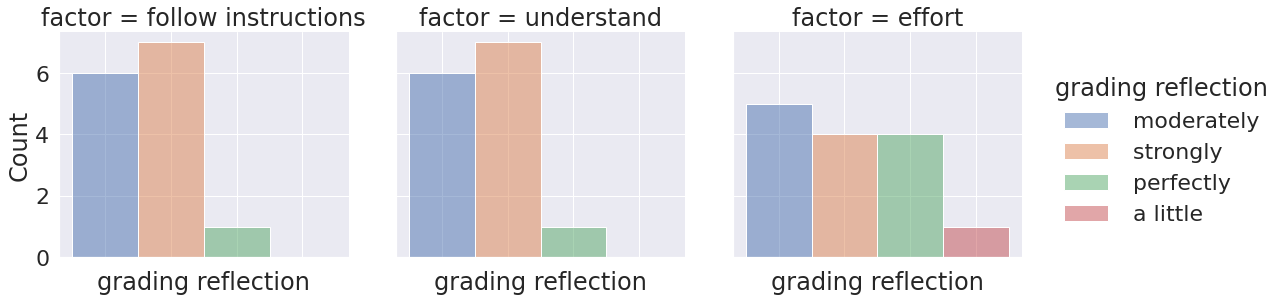

In [6]:
reflect_cols = [c_name for c_name in feedback_df.columns if 'reflects' in c_name]
reflect_df = feedback_df[reflect_cols].copy()
reflect_df.rename(columns = lambda c: c.split('[')[1].replace(']',''),inplace=True)
reflect_df = reflect_df.melt(var_name='factor',value_name='grading reflection')
reflect_df['grading reflection'] = reflect_df['grading reflection'].str.replace(' in the grading','')
reflect_df['grading reflection'] = reflect_df['grading reflection'].str.replace('Reflected','')

factor_kw = ['follow instructions','understand','effort']
# kw_replace =
reflect_df.replace({s: [kw for kw in factor_kw if kw in s][0] for s in reflect_df['factor']},inplace=True)
g = sns.displot(data = reflect_df, x='grading reflection',col='factor', hue = 'grading reflection',)
g.set(xticklabels=[]);

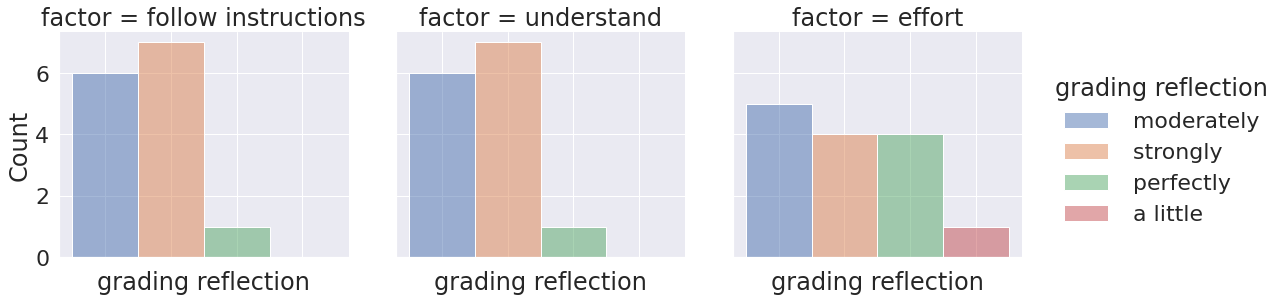

In [7]:
fair_cols = [c_name for c_name in feedback_df.columns if 'fair' in c_name]
fair_df = feedback_df[fair_cols].copy()
fair_df.rename(columns = lambda c: c.split('[')[1].replace(']',''),inplace=True)
fair_df = fair_df.melt(var_name='factor',value_name='fairness')
fair_df['fairness'] = fair_df['fairness'].str.replace(' in the grading','')
# reflect_df['grading reflection'] = reflect_df['grading reflection'].str.replace('Reflected','')

factor_kw = ['follow instructions','understand','effort']
# # kw_replace =
fair_df.replace({s: [kw for kw in factor_kw if kw in s][0] for s in fair_df['factor']},inplace=True)
g = sns.displot(data = reflect_df, x='grading reflection',col='factor', hue = 'grading reflection',)
g.set(xticklabels=[]);
# fair_df

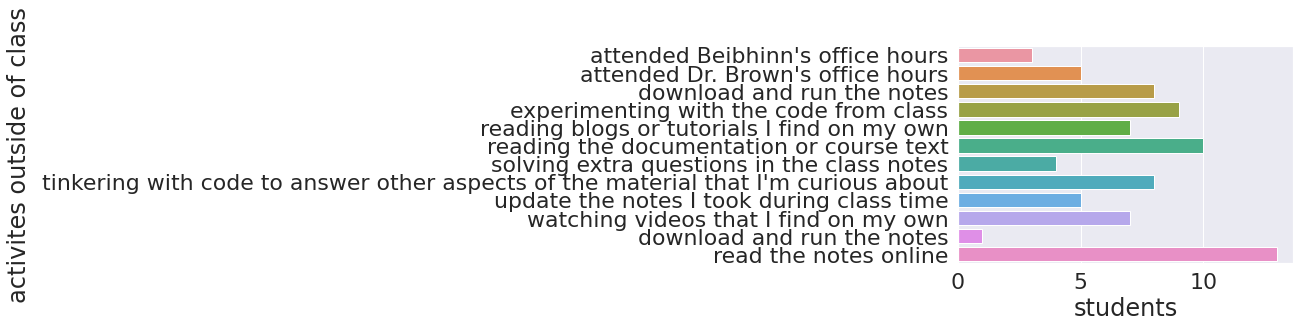

In [8]:
activity_col = [cname for cname in feedback_df.columns if 'outside' in cname][0]
activity_counts = pd.get_dummies(feedback_df[activity_col].str.split(',').apply(pd.Series).stack()).sum()
activity_counts = activity_counts.rename_axis(index='activites outside of class')
# activity_counts.plot.bar()
ac_clean = activity_counts.reset_index().rename(columns={0:'students'})
sns.barplot(data=ac_clean,y='activites outside of class',x='students',);

## Changes based on your feedback for the rest of the semester


- Assignments posted by Wed, due Tuesday (after this one, but I'm giving class time for it)
- Assignments will have a bit more detail or advice (this one is very structured because of the short time, but not all will be this closed).
- Office hours will stay the same, but deadlines moved
- Will collect descriptions of any [issued with Prismia.chat](https://forms.gle/L1n6iSTtUZe6mMeBA) to pass on to the developers

## Assignment

- Accept
- Git demo
- Read & make notes of a plan (what do you need to do? what methods will you use?)
- Discuss your plan in a breakout room


Questions:
1. Errors means misclassifications, samples where the classifier's prediction is not correct.

## More on Naive Bayes

From last week:

In [9]:
# %load http://drsmb.co/310
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [10]:
iris = sns.load_dataset("iris")

X_train, X_test, y_train, y_test = train_test_split(iris.values[:,:4],
                                                    iris.values[:,-1],
                                                    test_size=0.5, random_state=5)


gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

Remember we can check accuracy with the score method

In [11]:
gnb.score(X_test,y_test)

0.9466666666666667

We can inspect the trained classifier

In [12]:
gnb.__dict__

{'priors': None,
 'var_smoothing': 1e-09,
 'n_features_in_': 4,
 'epsilon_': 3.3870506666666674e-09,
 'classes_': array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 'theta_': array([[4.98571429, 3.40714286, 1.47142857, 0.23214286],
        [5.96190476, 2.76666667, 4.34285714, 1.31904762],
        [6.61923077, 2.95384615, 5.59230769, 2.01153846]]),
 'sigma_': array([[0.15551021, 0.17709184, 0.03275511, 0.00718113],
        [0.23188209, 0.0984127 , 0.15482994, 0.03392291],
        [0.48232249, 0.1071006 , 0.34686391, 0.06948225]]),
 'class_count_': array([28., 21., 26.]),
 'class_prior_': array([0.37333333, 0.28      , 0.34666667])}

Gaussian Niave Bayes learns the mean and variance for each feature in each class.  We can use that to generate synthetic data.

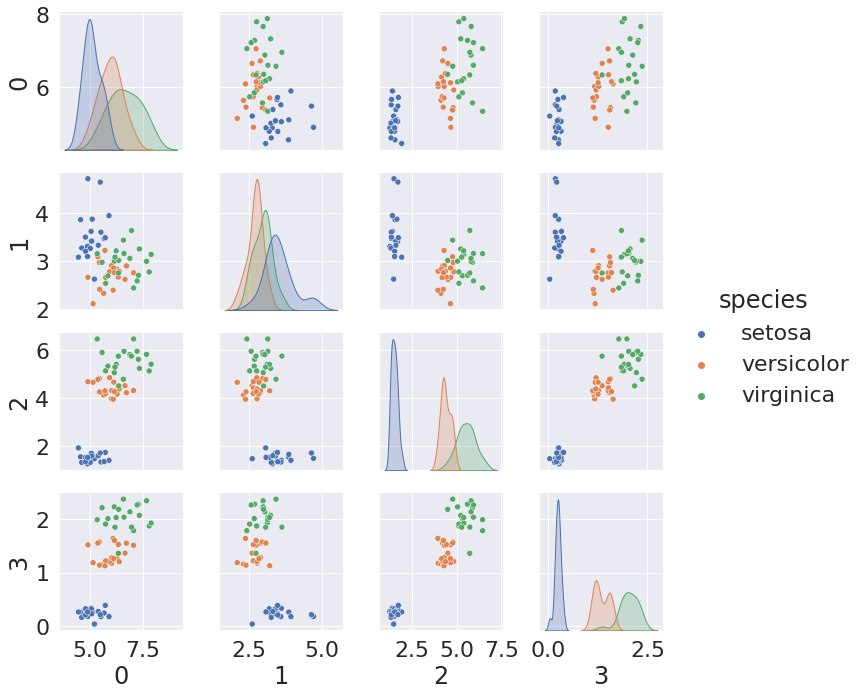

In [13]:
df = pd.DataFrame(np.concatenate([np.random.multivariate_normal(mu, sig*np.eye(4),20)
                                  for mu, sig in zip(gnb.theta_,gnb.sigma_)]))
df['species'] = [ci for cl in [[c]*20 for c in gnb.classes_] for ci in cl]
sns.pairplot(data =df, hue='species')

It decides for it's predictions by computing probabilities and predicting the highest probability one.  We can have it return these probabilities directly.

In [14]:
gnb.predict_proba(X_test)`

SyntaxError: invalid syntax (<ipython-input-14-e6a42f6fa178>, line 1)

We can use these to see how confident it is on each point.  First, we'll get the probability of the predicted class (the max in each row of the matrix).

In [15]:
pob_ypred = np.max(gnb.predict_proba(X_test),axis=1)
pob_ypred

array([0.9999498 , 0.70485761, 0.99999988, 1.        , 1.        ,
       0.99999528, 1.        , 0.88532403, 1.        , 0.98995685,
       0.98928212, 0.69406879, 0.99999999, 0.99999997, 1.        ,
       1.        , 0.90927501, 0.99999997, 1.        , 1.        ,
       0.99972898, 0.99999839, 1.        , 0.92449508, 0.99970908,
       0.99999997, 0.99857943, 0.99965594, 0.98844145, 0.99999983,
       1.        , 0.99993213, 0.9999939 , 1.        , 0.80885454,
       1.        , 1.        , 1.        , 1.        , 0.99999993,
       0.98915134, 0.99998516, 1.        , 1.        , 0.95513579,
       0.85016072, 0.99525954, 0.99999988, 1.        , 1.        ,
       0.98735446, 1.        , 1.        , 1.        , 1.        ,
       0.99906987, 0.67288225, 0.99999514, 0.9999897 , 0.96679497,
       0.99999729, 0.99986416, 0.99999998, 0.55849652, 1.        ,
       0.98840745, 1.        , 0.94307153, 0.99999991, 0.99990409,
       1.        , 0.99977424, 0.92205013, 0.99937796, 0.99994

Now, we'll put the test data into a `DataFrame` so we can use high level plotting functions from `pandas` and `seaborn`.  We could use the `numpy` data structures that scikit learn uses directly with `matplotlib` plotting and `numpy` statistics, but this is a little more compact and readable.

In [16]:
iris_test_df = pd.DataFrame(X_test,columns = iris.columns[:4])
iris_test_df['species'] = y_test
iris_test_df['species_pred'] = y_pred
iris_test_df['pob_ypred'] = pob_ypred
iris_test_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred,pob_ypred
0,5.8,2.7,3.9,1.2,versicolor,versicolor,0.999950
1,6.1,2.6,5.6,1.4,virginica,virginica,0.704858
2,5.8,2.8,5.1,2.4,virginica,virginica,1.000000
3,4.4,3.2,1.3,0.2,setosa,setosa,1.000000
4,7.2,3.6,6.1,2.5,virginica,virginica,1.000000


First we'll look at the one pairwise view of the data that was the most visually separate, `'petal_width'` vs `'petal_length'`

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

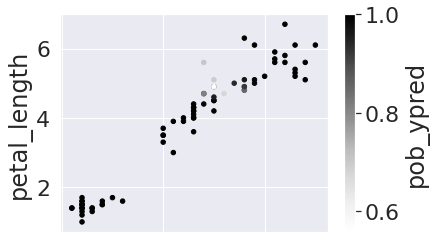

In [17]:
iris_test_df.plot.scatter(x='petal_width', y = 'petal_length',c='pob_ypred')

Notice that the points near the boundary are the lowest probability. We can inspect further by adding a `'correct'` column with boolean values

In [18]:
iris_test_df['correct'] = iris_test_df['species'] == iris_test_df['species_pred']

Now we can use EDA (exploratory data analysis) to further examine.

In [19]:
iris_test_df.groupby('correct')['pob_ypred'].describe()

,count,mean,std,min,25%,50%,75%,max
correct,,,,,,,,
False,4.0,0.770240,0.176779,0.558497,0.660176,0.789696,0.899761,0.943072
True,71.0,0.980814,0.059866,0.672882,0.999224,1.000000,1.000000,1.000000


The incorrectly (`False`) predicted samples were much lower confidence and higher variance in confidence. This suggests that the classifier is a good fit for the data, though it's imperfect on the test set, and that we should trust how it's working.

## Try it yourself

1. Can any of these things help with Assignment 6?
1. Review the datasets you've used for prior analyses, can they be used for any classification?
1. What kinds of data would be needed to train a classifier for some ML systems that you interact with?